In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
def read_csv():
    return pd.read_csv("/content/drive/MyDrive/Data Science/Datasets/Visa_For_Lisa_Loan_Modelling.csv")
df=read_csv()

In [4]:
def print_summary(dataset):
    print("Dimension: ")
    print('\n')
    print(dataset.shape)
    print("First 10 Rows:")
    print('\n')
    print(dataset.head(10))
    print("Statistical Summary:")
    print('\n')
    print(dataset.describe())

print_summary(df)

Dimension: 


(5000, 14)
First 10 Rows:


   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0     

In [5]:
def cleaning_dataset(dataset):
    columns=dataset.columns
    null_columns=[]
    for i in columns:
        if dataset[i].isna().sum() > 0:
             null_columns.append(i)

    if len(null_columns) > 0:
        new_dataset=dataset.dropna(axis=0)
    else:
        new_dataset=dataset.drop(columns=['Personal Loan'])
        new_dataset.insert(13, 'Personal Loan',dataset['Personal Loan'])
        new_dataset.set_index('ID',inplace=True)
        for col in ['Education', 'Securities Account','CD Account','Online','CreditCard','Personal Loan']:
            new_dataset[col] = new_dataset[col].astype('string')


    return new_dataset

df=cleaning_dataset(df)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0


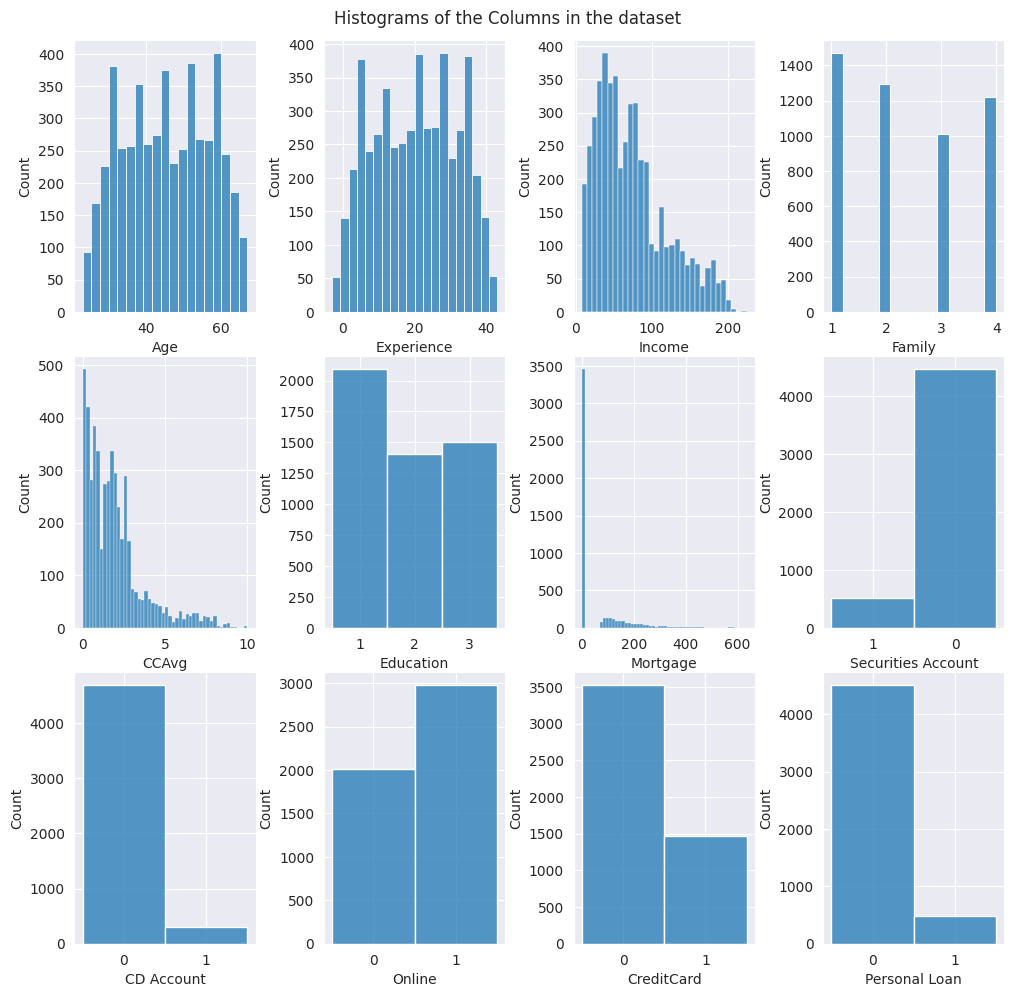

In [6]:
def printing_histograms(dataset):
    columns= []
    sns.set_style('darkgrid')
    for i in dataset.columns:
        if i == 'ZIP Code' or i == 'ID' :
            continue
        else:
            columns.append(i)


    fig, axes =plt.subplots(3,4,figsize=(10,10))
    rows=[]
    cols=[]
    for i in range(3):
        for j in range(4):
            rows.append(i)
            cols.append(j)


    for i in range(len(columns)):
        sns.histplot(dataset[columns[i]], ax=axes[rows[i], cols[i]])
    fig.tight_layout(pad=0.2)
    fig.suptitle("Histograms of the Columns in the dataset")
    plt.subplots_adjust(top=0.95)
    fig.savefig("Visa_Histograms.png")
    plt.show()


printing_histograms(df)

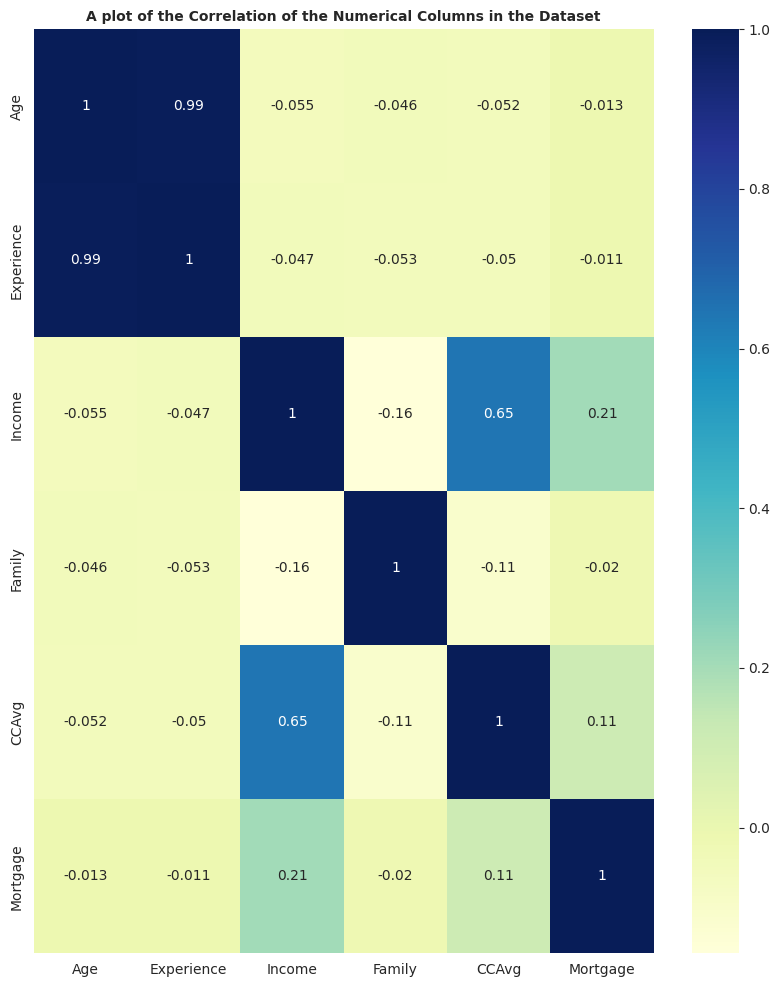

In [7]:
def print_scatter_matrix(dataset):
    columns= []
    for i in df.columns:
        if i == 'ZIP Code' or i == 'ID' :
            continue
        else:
            columns.append(i)
    new_data=dataset[columns]
    plt.figure(figsize=(10,12))
    plot=sns.heatmap(new_data.corr(), cmap='YlGnBu', annot=True)
    plt.title("A plot of the Correlation of the Numerical Columns in the Dataset", fontdict={'fontsize':10,'fontweight':'extra bold','horizontalalignment': 'center'}, y=1.0)
    plt.savefig("Scatter_Matrix.png")
    plt.show()
print_scatter_matrix(df)

# What is the distribution of the age groups

In [8]:
Age=df['Age'].value_counts().reset_index(name='Count').sort_values(by=['index']).reset_index(drop=True)
Age.rename(columns={'index':'Age'}, inplace=True)
Age.head()

,Age,Count
0,23,12
1,24,28
2,25,53
3,26,78
4,27,91


In [9]:
bins=np.array([22,34, 44, 64,max(Age['Age'])])
Age['Age_group']=pd.cut(Age['Age'],bins=bins
       , labels=["Early Adulthood", "Early Middle Age", "Late Middle Age","Late Adulthood"])


In [10]:
Age.head(10)

,Age,Count,Age_group
0,23,12,Early Adulthood
1,24,28,Early Adulthood
2,25,53,Early Adulthood
3,26,78,Early Adulthood
4,27,91,Early Adulthood
5,28,103,Early Adulthood
6,29,123,Early Adulthood
7,30,136,Early Adulthood
8,31,125,Early Adulthood
9,32,120,Early Adulthood


In [11]:
age_groups=Age.groupby('Age_group', as_index=False)[['Count']].sum()
age_groups.rename(columns={'Count':'Number'}, inplace=True)
age_groups

,Age_group,Number
0,Early Adulthood,1123
1,Early Middle Age,1269
2,Late Middle Age,2492
3,Late Adulthood,116


# What is the distribution of job experience

In [12]:
Exp=df['Experience'].value_counts().reset_index(name='Number').sort_values(by=['index']).reset_index(drop=True)
Exp.rename(columns={'index':'Years_of_exp'},inplace=True)
Exp.head()

,Years_of_exp,Number
0,-3,4
1,-2,15
2,-1,33
3,0,66
4,1,74


In [13]:
bins=np.array([-1,2,5, 8, 10,max(Exp['Years_of_exp'])])
Exp['Job_level']=pd.cut(Exp['Years_of_exp'],bins=bins
       , labels=["Entry_level", "Intermediate_level", "Experienced_level","Advanced_level","Expert_level"])


In [14]:
Exp.head()

,Years_of_exp,Number,Job_level
0,-3,4,NaN
1,-2,15,NaN
2,-1,33,NaN
3,0,66,Entry_level
4,1,74,Entry_level


In [15]:
exp=Exp.groupby('Job_level',as_index=False)[['Number']].sum()
exp

,Job_level,Number
0,Entry_level,225
1,Intermediate_level,388
2,Experienced_level,359
3,Advanced_level,265
4,Expert_level,3711


# Distribution by Age

In [16]:
df.head(3)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [17]:
df1=df.groupby('Age')[['Personal Loan']].value_counts().reset_index(name='values_count')
df1.head()

,Age,Personal Loan,values_count
0,23,0,12
1,24,0,28
2,25,0,53
3,26,0,65
4,26,1,13


In [18]:
bins=np.array([22,34, 44, 64,max(Age['Age'])])
df1['Age_group']=pd.cut(df1['Age'],bins=bins
       , labels=["Early Adulthood", "Early Middle Age", "Late Middle Age","Late Adulthood"])


In [19]:
df1.head()

,Age,Personal Loan,values_count,Age_group
0,23,0,12,Early Adulthood
1,24,0,28,Early Adulthood
2,25,0,53,Early Adulthood
3,26,0,65,Early Adulthood
4,26,1,13,Early Adulthood


In [20]:
age=df1.groupby(['Age_group','Personal Loan']).agg({'values_count':'sum'})
age['%']=age.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).round(2)
age=age.reset_index(level=1).reset_index(level=0)
age

,Age_group,Personal Loan,values_count,%
0,Early Adulthood,0,1005,89.49
1,Early Adulthood,1,118,10.51
2,Early Middle Age,0,1152,90.78
3,Early Middle Age,1,117,9.22
4,Late Middle Age,0,2261,90.73
5,Late Middle Age,1,231,9.27
6,Late Adulthood,0,102,87.93
7,Late Adulthood,1,14,12.07


In [21]:
text=[str(i)+ '%' for i in age['%']]
fig=px.bar(age,x='Age_group',y='values_count',color='Personal Loan', barmode='group',text=text,
          color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout({'plot_bgcolor':'rgba(0,175,200,0)'})
fig.update_layout({'title':{'text':'Distribution  of people who accepted and rejected the Loan by Age Groups ',
                            'x':0.2, 'y':0.95,
                            'font_size':15
                           }})
fig.show()

# Distribution by Income

In [22]:
df2=df.groupby('Income')[['Personal Loan']].value_counts().reset_index(name='values_count')
df2.head()

,Income,Personal Loan,values_count
0,8,0,23
1,9,0,26
2,10,0,23
3,11,0,27
4,12,0,30


In [23]:
bins=np.array([0,52.2, 156.6,max(df2['Income'])])
df2['income_group']=pd.cut(df2['Income'],bins=bins
       , labels=["Low Income Class", "Middle Income Class","Upper Income Class"])


In [24]:
df2.head()

,Income,Personal Loan,values_count,income_group
0,8,0,23,Low Income Class
1,9,0,26,Low Income Class
2,10,0,23,Low Income Class
3,11,0,27,Low Income Class
4,12,0,30,Low Income Class


In [25]:
income=df2.groupby(['income_group','Personal Loan']).agg({'values_count':'sum'})
income['%']=income.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).round(2)
income=income.reset_index(level=1).reset_index(level=0)
income

,income_group,Personal Loan,values_count,%
0,Low Income Class,0,2002,100.00
1,Low Income Class,1,0,0.00
2,Middle Income Class,0,2340,89.11
3,Middle Income Class,1,286,10.89
4,Upper Income Class,0,178,47.85
5,Upper Income Class,1,194,52.15


In [26]:
text=[str(i)+ '%' for i in income['%']]
fig=px.bar(income,x='income_group',y='values_count',color='Personal Loan', barmode='group',text=text,
          color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout({'plot_bgcolor':'rgba(0,175,200,0)'})
fig.update_layout({'title':{'text':'Distribution of People who accepted and rejected the Loans by income group',
                            'x':0.2, 'y':0.95,
                            'font_size':15
                           }})
fig.show()

# Distribution by Family

In [27]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [28]:
df3=df.groupby('Family')[['Personal Loan']].value_counts().reset_index(name='values_count')
df3.head(6)

,Family,Personal Loan,values_count
0,1,0,1365
1,1,1,107
2,2,0,1190
3,2,1,106
4,3,0,877
5,3,1,133


In [29]:
family=df3.groupby(['Family','Personal Loan']).agg({'values_count':'sum'})
family['%']=family.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).round(2)
family=family.reset_index(level=1).reset_index(level=0)
family

,Family,Personal Loan,values_count,%
0,1,0,1365,92.73
1,1,1,107,7.27
2,2,0,1190,91.82
3,2,1,106,8.18
4,3,0,877,86.83
5,3,1,133,13.17
6,4,0,1088,89.03
7,4,1,134,10.97


In [30]:
text=[str(i)+ '%' for i in family['%']]
fig=px.bar(family,x='Family',y='values_count',color='Personal Loan', barmode='group',text=text,
          color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout({'plot_bgcolor':'rgba(0,175,200,0)'})
fig.update_layout({'title':{'text':'Distribution of People who accepted and rejected the Loans by Family group',
                            'x':0.2, 'y':0.95,
                            'font_size':15
                           }})
fig.show()

# Distribution by Education

In [31]:
df4=df.groupby('Education')[['Personal Loan']].value_counts().reset_index(name='values_count')
df4.head()

,Education,Personal Loan,values_count
0,1,0,2003
1,1,1,93
2,2,0,1221
3,2,1,182
4,3,0,1296


In [32]:
edu=df4.groupby(['Education','Personal Loan']).agg({'values_count':'sum'})
edu['%']=edu.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).round(2)
edu=edu.reset_index(level=1).reset_index(level=0)
edu

,Education,Personal Loan,values_count,%
0,1,0,2003,95.56
1,1,1,93,4.44
2,2,0,1221,87.03
3,2,1,182,12.97
4,3,0,1296,86.34
5,3,1,205,13.66


In [33]:
text=[str(i)+ '%' for i in edu['%']]
fig=px.bar(edu,x='Education',y='values_count',color='Personal Loan', barmode='group',text=text,
          color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout({'plot_bgcolor':'rgba(255,99,71,0.05)'})
fig.update_layout({'title':{'text':'Distribution of People who accepted and rejected the Loans by Education',
                            'x':0.2, 'y':0.95,
                            'font_size':15
                           }})
fig.show()

In [34]:
df5=df.groupby('Securities Account')[['Personal Loan']].value_counts().reset_index(name='values_count')
df5.head()

,Securities Account,Personal Loan,values_count
0,0,0,4058
1,0,1,420
2,1,0,462
3,1,1,60


In [35]:
mortage=df5.groupby(['Securities Account','Personal Loan']).agg({'values_count':'sum'})
mortage['%']=mortage.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).round(2)
mortage=mortage.reset_index(level=1).reset_index(level=0)
mortage

,Securities Account,Personal Loan,values_count,%
0,0,0,4058,90.62
1,0,1,420,9.38
2,1,0,462,88.51
3,1,1,60,11.49


In [36]:
text=[str(i)+ '%' for i in mortage['%']]
fig=px.bar(mortage,x='Securities Account',y='values_count',color='Personal Loan', barmode='group',text=text,
          color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout({'plot_bgcolor':'rgba(255,99,71,0.05)'})
fig.update_layout({'title':{'text':'Distribution of People who accepted and rejected the Loans by Securities',
                            'x':0.2, 'y':0.95,
                            'font_size':15
                           }})
fig.show()

In [37]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [38]:
df6=df.groupby('CD Account')[['Personal Loan']].value_counts().reset_index(name='values_count')
df6.head()

,CD Account,Personal Loan,values_count
0,0,0,4358
1,0,1,340
2,1,0,162
3,1,1,140


In [39]:
CD_acc=df6.groupby(['CD Account','Personal Loan']).agg({'values_count':'sum'})
CD_acc['%']=CD_acc.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).round(2)
CD_acc=CD_acc.reset_index(level=1).reset_index(level=0)
CD_acc

,CD Account,Personal Loan,values_count,%
0,0,0,4358,92.76
1,0,1,340,7.24
2,1,0,162,53.64
3,1,1,140,46.36


In [40]:
text=[str(i)+ '%' for i in CD_acc['%']]
fig=px.bar(CD_acc,x='CD Account',y='values_count',color='Personal Loan', barmode='group',text=text,
          color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout({'plot_bgcolor':'rgba(255,99,71,0.05)'})
fig.update_layout({'title':{'text':'Distribution of People who accepted and rejected the Loans by CD Accounts',
                            'x':0.2, 'y':0.95,
                            'font_size':15
                           }})
fig.show()

In [41]:
df7=df.groupby('Online')[['Personal Loan']].value_counts().reset_index(name='values_count')
df7.head()

,Online,Personal Loan,values_count
0,0,0,1827
1,0,1,189
2,1,0,2693
3,1,1,291


In [42]:
online=df7.groupby(['Online','Personal Loan']).agg({'values_count':'sum'})
online['%']=online.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).round(2)
online=online.reset_index(level=1).reset_index(level=0)
online

,Online,Personal Loan,values_count,%
0,0,0,1827,90.62
1,0,1,189,9.38
2,1,0,2693,90.25
3,1,1,291,9.75


In [43]:
text=[str(i)+ '%' for i in online['%']]
fig=px.bar(online,x='Online',y='values_count',color='Personal Loan', barmode='group',text=text,
          color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout({'plot_bgcolor':'rgba(255,99,71,0.05)'})
fig.update_layout({'title':{'text':'Distribution of People who accepted and rejected the Loans by customers who use Online Banking',
                            'x':0.2, 'y':0.95,
                            'font_size':15
                           }})
fig.show()

In [44]:
df8=df.groupby('CreditCard')[['Personal Loan']].value_counts().reset_index(name='values_count')
df8.head()

,CreditCard,Personal Loan,values_count
0,0,0,3193
1,0,1,337
2,1,0,1327
3,1,1,143


In [45]:
cred_card=df8.groupby(['CreditCard','Personal Loan']).agg({'values_count':'sum'})
cred_card['%']=cred_card.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).round(2)
cred_card=cred_card.reset_index(level=1).reset_index(level=0)
cred_card

,CreditCard,Personal Loan,values_count,%
0,0,0,3193,90.45
1,0,1,337,9.55
2,1,0,1327,90.27
3,1,1,143,9.73


In [46]:
text=[str(i)+ '%' for i in cred_card['%']]
fig=px.bar(cred_card,x='CreditCard',y='values_count',color='Personal Loan', barmode='group',text=text,
          color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout({'plot_bgcolor':'rgba(255,99,71,0.05)'})
fig.update_layout({'title':{'text':'Distribution of People who accepted and rejected the Loans by customers who have Credit Cards',
                            'x':0.2, 'y':0.95,
                            'font_size':15
                           }})
fig.show()

In [47]:
data0=list(df[df['Personal Loan']== '0']['CCAvg'])
data1=list(df[df['Personal Loan']== '1']['CCAvg'])
hist_data = [data0, data1]
group_labels = ['0','1']
colors = ['#333F44', '#37AA9C', ] #'#94F3E4'

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels,curve_type='normal',colors=colors,histnorm='probability density', show_rug=False)

# Add title
fig.update_layout(title_text='CCAvg for Customers')
fig.update_layout({'plot_bgcolor':'rgba(255,99,71,0.05)'})
fig.show()

# Initiating my models

In [48]:
#initiating the logistic regression
log_reg=LogisticRegression()

#initiating the naive bayes model
naive_bayes=GaussianNB()

#initiating the KNN model
knn=KNeighborsClassifier(n_neighbors=15)

#initializing the the RandomForest model
random=RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=101,max_features=None,min_samples_leaf=30)

#initializing the Support Vector Machine
SVM = SVC(kernel="linear",C=0.025, random_state=101)

#initializing the Decision Tree
dtree=DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=15)

# Splitting the data into training and testing

In [55]:
X=df.drop('Personal Loan', axis=1).astype(float)
y= df['Personal Loan'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
clf = {'Logistric Regression':log_reg, 'Naive Bayes':naive_bayes, 'KNN':knn,'Random Forests':random, 'Support Vector Machine':SVM,

      'Decision Trees': dtree}

evaluations=[]

for classifier in clf.values():
    evals={}
    y_pred=classifier.fit(X_train, y_train).predict(X_test)
    evals['Accuracy']= accuracy_score(y_test, y_pred)
    evals['Precison']= precision_score(y_test, y_pred,pos_label=1)
    evals['Recall']= recall_score(y_test, y_pred,pos_label=1)
    evals['F1']= f1_score(y_test, y_pred,pos_label=1)
    evaluations.append(evals)

metrics=pd.DataFrame(evaluations, index=['Logistric Regression','Naive Bayes','KNN','Random Forests','Support Vector Machine','Decision Trees'])
metrics

,Accuracy,Precison,Recall,F1
Logistric Regression,0.909,0.634615,0.314286,0.420382
Naive Bayes,0.901,0.524194,0.619048,0.567686
KNN,0.899,0.625000,0.095238,0.165289
Random Forests,0.983,0.978261,0.857143,0.913706
Support Vector Machine,0.911,0.648148,0.333333,0.440252
Decision Trees,0.989,0.989583,0.904762,0.945274


From the above dataframe, we can see that our best result comes from the Random Forests and Decision Trees. So we will try to use hyperparamters to see if we can get any improvement from the models

# Improving the Models

# Improving the Random Forests Model with tuning

In [57]:
n_estimators= [20,50, 100]
min_samples_leaf = [2, 5, 10]
max_depth = [3, 5, 7]
max_features= ['auto','sqrt','log2','None']
RandomForest_grid_search = GridSearchCV(RandomForestClassifier(), param_grid={'n_estimators':n_estimators, 'min_samples_leaf':min_samples_leaf,
                                                                       'max_depth':max_depth,'max_features':max_features})
RandomForest_grid_search.fit(X_train, y_train)
print(RandomForest_grid_search.best_params_)

{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 50}


# Improving the Decision Tree Model with Tuning

In [58]:
max_depth =[2,5,10,None]
min_samples_split=[2, 5, 10, None]
min_samples_leaf=[1,5,7]
max_features= [1, 2, 3]
criterion= ['gini', 'entropy']

DecisionTree_grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth':max_depth, 'min_samples_split':min_samples_split,
                                                                    'min_samples_leaf':min_samples_leaf,
                                                                    'max_features':max_features,
                                                                    'criterion':criterion})
DecisionTree_grid_search.fit(X_train, y_train)
print(DecisionTree_grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


Now that we have tuned the parameters of the model we will evaluate the model again so we can choose the best model for this task

In [60]:
clf_2 = {

    'Random Forest':RandomForestClassifier(max_depth= 7, max_features='sqrt', min_samples_leaf= 2, n_estimators= 100),
    'Decision Trees':DecisionTreeClassifier(criterion='gini',max_depth=None,max_features=3, min_samples_leaf=1, min_samples_split = 2)
}

evaluations2=[]
for classifier in clf_2.values():
    evals_2={}
    y_pred=classifier.fit(X_train, y_train).predict(X_test)
    evals_2['Accuracy']= accuracy_score(y_test, y_pred)
    evals_2['Precison']= precision_score(y_test, y_pred,pos_label=1)
    evals_2['Recall']= recall_score(y_test, y_pred,pos_label= 1)
    evals_2['F1']= f1_score(y_test, y_pred,pos_label= 1)
    evaluations2.append(evals_2)

metrics2=pd.DataFrame(evaluations2, index=['Random Forests','Decision Trees'])
metrics2

,Accuracy,Precison,Recall,F1
Random Forests,0.988,0.989474,0.895238,0.940000
Decision Trees,0.981,0.957447,0.857143,0.904523


Based on the above , the best model for this task is the Random Forest